# Rule based Sentiment Analysis
using TextBlob, VADER, SentiWordNet

### Data preprocessing steps
1. Cleaning the text
2. Tokenization
3. Enrichment - POS tagging
4. Stopwords removal
5. Obtaining the stem words

Importing dataset

In [1]:
import pandas as pd

# Creating a pandas dataframe from reviews.txt file
data = pd.read_csv('/content/CRCL Mess Data.tsv', sep='\t')
data.head()

,Mention Year,Current Mess,Quality of food,Food Variety,Adequacy of food and position of queue at the counter,Hygiene Levels,Overall Rating,Review
0,Junior,CRCL,4,3,4,3,3,Overall nice
1,Fresher,CRCL,3,1,2,2,5,Taste is good
2,Fresher,CRCL,2,3,3,3,3,Good
3,Sophomore,CRCL,3,2,2,1,3,Better
4,Junior,CRCL,1,1,2,2,4,"Everything is bad , we can't get our favourites"


### Step 1: Cleaning the text

In [2]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
data['Cleaned Reviews'] = data['Review'].apply(clean)
data.head()

,Mention Year,Current Mess,Quality of food,Food Variety,Adequacy of food and position of queue at the counter,Hygiene Levels,Overall Rating,Review,Cleaned Reviews
0,Junior,CRCL,4,3,4,3,3,Overall nice,Overall nice
1,Fresher,CRCL,3,1,2,2,5,Taste is good,Taste is good
2,Fresher,CRCL,2,3,3,3,3,Good,Good
3,Sophomore,CRCL,3,2,2,1,3,Better,Better
4,Junior,CRCL,1,1,2,2,4,"Everything is bad , we can't get our favourites",Everything is bad we can t get our favourites


### Steps 2-4: Tokenization, POS tagging, stopwords removal

In [3]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [6]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

data['POS tagged'] = data['Cleaned Reviews'].apply(token_stop_pos)
data.head()

,Mention Year,Current Mess,Quality of food,Food Variety,Adequacy of food and position of queue at the counter,Hygiene Levels,Overall Rating,Review,Cleaned Reviews,POS tagged
0,Junior,CRCL,4,3,4,3,3,Overall nice,Overall nice,"[(Overall, a), (nice, n)]"
1,Fresher,CRCL,3,1,2,2,5,Taste is good,Taste is good,"[(Taste, n), (good, a)]"
2,Fresher,CRCL,2,3,3,3,3,Good,Good,"[(Good, a)]"
3,Sophomore,CRCL,3,2,2,1,3,Better,Better,"[(Better, r)]"
4,Junior,CRCL,1,1,2,2,4,"Everything is bad , we can't get our favourites",Everything is bad we can t get our favourites,"[(Everything, n), (bad, a), (get, v), (favouri..."


### Step 5: Obtaining the stem words

#### Lemmatization

In [7]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
data['Lemma'] = data['POS tagged'].apply(lemmatize)
data.head()
# print(mydata['review'][239] + "\n" + mydata['Lemma'][239])

,Mention Year,Current Mess,Quality of food,Food Variety,Adequacy of food and position of queue at the counter,Hygiene Levels,Overall Rating,Review,Cleaned Reviews,POS tagged,Lemma
0,Junior,CRCL,4,3,4,3,3,Overall nice,Overall nice,"[(Overall, a), (nice, n)]",Overall nice
1,Fresher,CRCL,3,1,2,2,5,Taste is good,Taste is good,"[(Taste, n), (good, a)]",Taste good
2,Fresher,CRCL,2,3,3,3,3,Good,Good,"[(Good, a)]",Good
3,Sophomore,CRCL,3,2,2,1,3,Better,Better,"[(Better, r)]",Better
4,Junior,CRCL,1,1,2,2,4,"Everything is bad , we can't get our favourites",Everything is bad we can t get our favourites,"[(Everything, n), (bad, a), (get, v), (favouri...",Everything bad get favourite


In [8]:
data[['Review', 'Lemma']]

,Review,Lemma
0,Overall nice,Overall nice
1,Taste is good,Taste good
2,Good,Good
3,Better,Better
4,"Everything is bad , we can't get our favourites",Everything bad get favourite
...,...,...
299,Never again will I be dining at this place!,Never din place
300,The food was excellent and service was very good.,food excellent service good
301,good food selection.,good food selection
302,Food was really boring.,Food really boring


# Sentiment analysis using TextBlob

In [9]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [10]:
fin_data = pd.DataFrame(data[['Review', 'Lemma']])

In [11]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,Review,Lemma,Polarity,Analysis
0,Overall nice,Overall nice,0.3,Positive
1,Taste is good,Taste good,0.7,Positive
2,Good,Good,0.7,Positive
3,Better,Better,0.5,Positive
4,"Everything is bad , we can't get our favourites",Everything bad get favourite,-0.7,Negative


In [12]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    140
Neutral      91
Negative     73
Name: Analysis, dtype: int64

In [13]:
# saving the output in csv file
review_output=fin_data.to_csv('review_output.csv')

([<matplotlib.patches.Wedge at 0x7f8966a77c40>,
 [Text(0.1360618890174122, 1.091552638381225, 'Positive'),
  Text(-0.8466944113067224, -0.7022168994420193, 'Neutral'),
  Text(0.9837254880729095, -0.9245453823992181, 'Negative')],
 [Text(0.07421557582767938, 0.595392348207941, '46.1%'),
  Text(-0.46183331525821214, -0.3830273996956468, '29.9%'),
  Text(0.6193827147125726, -0.5821211666958039, '24.0%')])

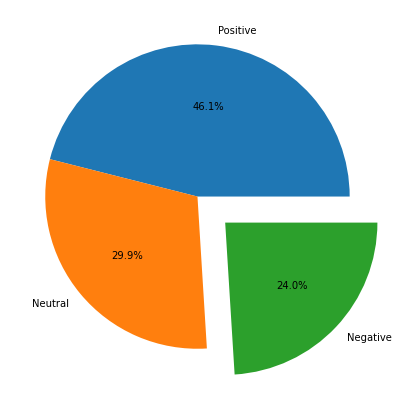

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
# plt.legend()

# Sentiment analysis using VADER

In [15]:
import nltk
from nltk.sentiment import vader

In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [17]:
import nltk
from nltk.sentiment import vader
sia = vader.SentimentIntensityAnalyzer()
# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = sia.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [18]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,Review,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,Overall nice,Overall nice,0.3,Positive,0.4215,Neutral
1,Taste is good,Taste good,0.7,Positive,0.4404,Neutral
2,Good,Good,0.7,Positive,0.4404,Neutral
3,Better,Better,0.5,Positive,0.4404,Neutral
4,"Everything is bad , we can't get our favourites",Everything bad get favourite,-0.7,Negative,-0.5423,Negative


In [19]:
# saving the output in csv file
review_output_vader=fin_data.to_csv('review_output_vader.csv')

In [20]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Neutral     195
Positive     73
Negative     36
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f89668dbaf0>,
 [Text(-0.5158669841839599, 1.0834580077829257, 'Neutral'),
  Text(0.0795038063871715, -1.0971231219739885, 'Positive'),
  Text(1.0247501746894765, -0.39985882442918225, 'Negative')],
 [Text(-0.3009224074406433, 0.6320171712067065, '64.1%'),
  Text(0.04336571257482081, -0.5984307938039937, '24.0%'),
  Text(0.5589546407397145, -0.2181048133250085, '11.8%')])

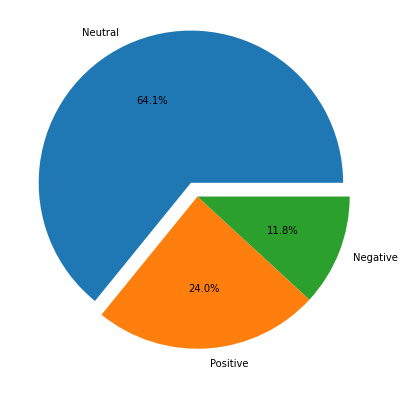

In [21]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

# Visual representation of TextBlob, VADER, SentiWordNet results

([<matplotlib.patches.Wedge at 0x7f896611acd0>,
 [Text(-0.4728780688352966, 0.9931698404676819, 'Neutral'),
  Text(0.0795038063871715, -1.0971231219739885, 'Positive'),
  Text(1.2576479416643576, -0.49073582998126913, 'Negative')],
 [Text(-0.25793349209197997, 0.5417290038914627, '64.1%'),
  Text(0.04336571257482081, -0.5984307938039937, '24.0%'),
  Text(0.7918524077145954, -0.30898181887709536, '11.8%')])

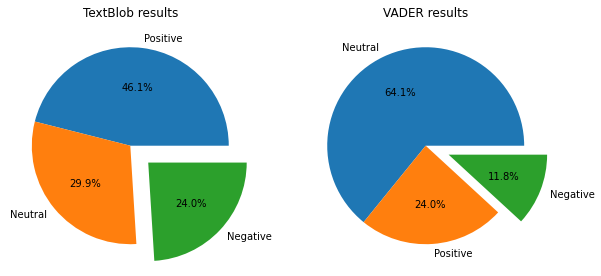

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

